In [1]:
!pip install chart-studio

     |████████████████████████████████| 71kB 5.3MB/s 


In [2]:
import numpy as np 
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
import plotly.graph_objs as go
from chart_studio import plotly
from sklearn.utils import shuffle
import cufflinks
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
""" Warning : Don't forget to remove your github username and token after running this cell """

# Username of your GitHub account
 
username = ''
 
# Personal Access Token (PAO) from your GitHub account
 
token = ''
 
# Creates a re-usable session object with your creds in-built
 
github_session = requests.Session()
github_session.auth = (username, token)

" Warning : Don't forget to remove your github username and token after running this cell "

In [5]:
#Loading the file so we can be able to clean it

url = 'https://raw.githubusercontent.com/OmdenaAI/WeoWater/main/task-4-scraping-newspapers/labelled_data/cleaned_merged_labbeled_newspaper_data.csv'

download = github_session.get(url).content #Reading and downloading the data

data = pd.read_csv(io.StringIO(download.decode('utf-8'))) #Converting the data into a pd dataframe

In [6]:
def review_to_words(review):
    nltk.download("stopwords", quiet=True)
    stemmer = PorterStemmer()
    
    text = BeautifulSoup(review, "html.parser").get_text() # Remove HTML tags
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower()) # Convert to lower case
    words = text.split() # Split string into words
    
    words = [w for w in words if w not in stopwords.words("english")] # Remove stopwords
    words = [PorterStemmer().stem(w) for w in words] # stem
    
    return words

In [7]:
df_article_title = data['article_title']

In [7]:
df_article_content = data['article_content']

In [8]:
words = review_to_words(df_article_title[2615])
print(words)

['nigeria', 'flood', 'edo', 'govt', 'deploy', 'earli', 'warn', 'equip', 'preventionweb']


In [9]:
words = review_to_words(df_article_content[2615])
print(words)

['sourc', 'nigerian', 'observ', 'bendel', 'newspap', 'compani', 'limit', 'bncl', 'benin', 'citi', 'edo', 'state', 'govern', 'conclud', 'plan', 'deploy', 'flood', 'earli', 'warn', 'region', 'weather', 'equip', 'state', 'dr', 'obaseki', 'said', 'soon', 'instal', 'flood', 'earli', 'warn', 'weather', 'facil', 'govern', 'would', 'better', 'protect', 'resid', 'state', 'flood', 'weather', 'induc', 'disast', 'accord', 'earli', 'warn', 'sign', 'gener', 'facil', 'instal', 'would', 'better', 'place', 'govern', 'take', 'proactiv', 'measur', 'protect', 'live', 'properti']


In [9]:
data['article_title'] = data['article_title'].apply(review_to_words)

In [10]:
data = data.dropna()

In [12]:
data['article_content'] = data['article_content'].apply(review_to_words) 

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning:

"https://www.latimes.com/local/lanow/la-me-ln-ucla-flood-repairs-damages-20140801-story.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



In [11]:
data.head()

,Unnamed: 0,event_id,article_title,article_link,article_content,publishing_date,article_image,article_keywords,category,country
0,200,DR-2014-000109-CHN,"[worst, drought, 63, year, hit, liaon, provinc...",https://www.scmp.com/news/china/article/157349...,Liaoning averaged 90mm across the province in ...,"Thu, 14 Aug 2014 07:00:00 GMT",https://cdn1.i-scmp.com/sites/default/files/st...,"['averaged', 'liaoning', 'hits', 'dry', 'droug...",drought,China
1,201,DR-2014-000109-CHN,"[time, drought, u, west, alfalfa, export, crit...",https://www.npr.org/2014/08/12/339753108/in-ti...,"In Time Of Drought, U.S. West's Alfalfa Export...","Tue, 12 Aug 2014 07:00:00 GMT",https://media.npr.org/include/images/facebook-...,"['criticized', 'river', 'drought', 'farmers', ...",drought,China
2,202,DR-2014-000109-CHN,"[chines, coast, less, fish, sea, scientif, ame...",https://www.scientificamerican.com/article/mor...,China's booming economic growth is helping to ...,"Fri, 08 Aug 2014 07:00:00 GMT",http://www.scientificamerican.com/themes/respo...,"['bertness', 'chinese', 'research', 'sea', 'ec...",none,China
3,203,DR-2014-000109-CHN,"[climat, chang, drought, ancient, time, scienc...",https://www.sciencedaily.com/releases/2014/08/...,The influence of climate on agriculture is bel...,"Mon, 11 Aug 2014 07:00:00 GMT",https://www.sciencedaily.com/images/scidaily-i...,"['climate', 'drought', 'ancient', 'agriculture...",drought,China
5,205,DR-2014-000109-CHN,"[california, sever, drought, unchang, despit, ...",https://www.latimes.com/local/lanow/la-me-ln-r...,A series of thunderstorms that have hit Califo...,"Thu, 07 Aug 2014 07:00:00 GMT",https://ca-times.brightspotcdn.com/dims4/defau...,"['drought', 'states', 'rain', 'despite', 'cali...",drought,China


In [12]:
df_drought = data[data.category == 'drought']
df_drought.shape

(301, 10)

In [13]:
df_flood = data[data.category == 'flood']
df_flood.shape

(2081, 10)

In [14]:
df_none = data[data.category == 'none']
df_none.shape

(1248, 10)

In [15]:
df_drought = shuffle(df_drought)
df_flood = shuffle(df_flood)
df_none = shuffle(df_none)

In [16]:
df_train_d = df_drought.head(251)
df_train_d.shape

(251, 10)

In [17]:
df_train_f = df_flood.head(251)
df_train_f.shape

(251, 10)

In [18]:
df_train_n = df_none.head(251)
df_train_n.shape

(251, 10)

In [19]:
df_test_d = df_drought.tail(50)
df_test_d.shape

(50, 10)

In [20]:
df_test_f = df_flood.tail(50)
df_test_f.shape

(50, 10)

In [21]:
df_test_n = df_none.tail(50)
df_test_n.shape

(50, 10)

In [22]:
#concatenating
df_train =pd.concat([df_train_d,df_train_f,df_train_n], ignore_index=True)
df_train = shuffle(df_train)
df_train.shape

(753, 10)

In [23]:
#concatenating
df_test =pd.concat([df_test_d,df_test_f,df_test_n], ignore_index=True)
df_test = shuffle(df_test)
df_test.shape

(150, 10)

In [24]:
df_train.category.value_counts()

drought    251
none       251
flood      251
Name: category, dtype: int64

In [27]:
 #changing the type from object to category
 df_train['category']=df_train['category'].astype('category')
 df_test['category']=df_test['category'].astype('category')

In [29]:
# Get the numerical ids of column label
numerical_ids_train = df_train.category.cat.codes
numerical_ids_test = df_test.category.cat.codes

# Print initial shape
print(numerical_ids_train.shape)
print(numerical_ids_test.shape)

(753,)
(150,)


In [30]:
# One-hot encode the indexes
Y = to_categorical(numerical_ids_train)
Y_test = to_categorical(numerical_ids_test)

# Check the new shape of the variable
print(Y.shape)
print(Y_test.shape)

# Print the first 5 rows
print(Y[:5])
print(Y_test[:5])

(753, 3)
(150, 3)
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [27]:
df_train['category'] = df_train['category'].replace({'flood':1,'drought':2,'none':3})

In [28]:
df_test['category'] = df_test['category'].replace({'flood':1,'drought':2,'none':3})

In [56]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.article_title)
# Create the (X, Y) variables
X = tokenizer.texts_to_sequences(df_train.article_title)
X = pad_sequences(X, maxlen=20)
#Y = to_categorical(df_train.category)
# Print the shapes
print(X.shape)
print(Y.shape)

(753, 20)
(753, 3)


In [57]:
# Create the (X, Y) variables
X_test = tokenizer.texts_to_sequences(df_test.article_title)
X_test = pad_sequences(X_test, maxlen=20)
#Y_test = to_categorical(df_test.category)

In [58]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 3000


EMBEDDING_DIM = 100

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 2228 unique tokens.


In [59]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 100)           300000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 20, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 380,703
Trainable params: 380,703
Non-trainable params: 0
_________________________________________________________________
None


In [60]:
epochs = 10
batch_size = 64

history = model.fit(X, Y, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
11/11 [==============================] - 7s 236ms/step - loss: 1.0964 - accuracy: 0.3582 - val_loss: 1.0839 - val_accuracy: 0.3947
Epoch 2/10
11/11 [==============================] - 1s 137ms/step - loss: 1.0640 - accuracy: 0.6412 - val_loss: 1.0058 - val_accuracy: 0.7500
Epoch 3/10
11/11 [==============================] - 2s 142ms/step - loss: 0.9297 - accuracy: 0.7261 - val_loss: 0.7876 - val_accuracy: 0.7237
Epoch 4/10
11/11 [==============================] - 2s 141ms/step - loss: 0.6942 - accuracy: 0.7254 - val_loss: 0.7049 - val_accuracy: 0.6447
Epoch 5/10
11/11 [==============================] - 1s 132ms/step - loss: 0.4671 - accuracy: 0.8483 - val_loss: 0.5401 - val_accuracy: 0.7895
Epoch 6/10
11/11 [==============================] - 1s 133ms/step - loss: 0.2663 - accuracy: 0.9127 - val_loss: 0.4985 - val_accuracy: 0.7763
Epoch 7/10
11/11 [==============================] - 1s 136ms/step - loss: 0.1781 - accuracy: 0.9466 - val_loss: 0.5445 - val_accuracy: 0.7632
Epoch 

In [61]:
accr = model.evaluate(X_test, Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

5/5 [==============================] - 0s 15ms/step - loss: 0.6319 - accuracy: 0.7733
Test set
  Loss: 0.632
  Accuracy: 0.773


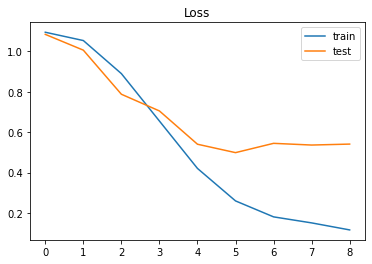

In [62]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

Text(0.5, 1.0, 'Accuracy')

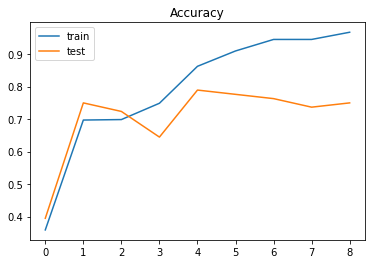

In [63]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [64]:
y_pred = model.predict(X_test)

In [56]:
import numpy as np
y_pred=np.round(y_pred)

In [65]:
y_pred = np.argmax(y_pred, axis=-1)

In [66]:
y_test = np.argmax(Y_test, axis=-1)

In [67]:
y_pred

array([1, 1, 1, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 1, 2, 1, 2, 0, 1, 0,
       1, 1, 0, 2, 0, 2, 1, 1, 1, 2, 1, 2, 1, 0, 0, 2, 0, 1, 1, 2, 1, 1,
       0, 2, 0, 0, 0, 2, 1, 2, 0, 1, 1, 0, 2, 2, 1, 2, 1, 2, 1, 0, 2, 2,
       1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 2, 0, 0, 0, 1, 1, 2, 0, 2, 0,
       0, 1, 1, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 2, 0, 0, 2, 2, 1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 2,
       1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 1, 1])

In [68]:
# Accuracy
print(accuracy_score(y_test, y_pred))

0.7733333333333333


In [69]:
print(precision_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None))
print(f1_score(y_test, y_pred, average=None))

[0.86956522 0.78571429 0.66666667]
[0.8  0.88 0.64]
[0.83333333 0.83018868 0.65306122]


In [70]:
lab_names = ['flood', 'drought', 'none']
print(classification_report(y_test, y_pred, target_names=lab_names))

              precision    recall  f1-score   support

       flood       0.87      0.80      0.83        50
     drought       0.79      0.88      0.83        50
        none       0.67      0.64      0.65        50

    accuracy                           0.77       150
   macro avg       0.77      0.77      0.77       150
weighted avg       0.77      0.77      0.77       150



In [71]:
# Get probabilities for each class
pred_probabilities = model.predict(X_test)
DEFAULT_CLASS = 2
# Thresholds at 0.5 and 0.8
y_pred_50 = [np.argmax(x) if np.max(x) >= 0.5 else DEFAULT_CLASS for x in pred_probabilities]
y_pred_80 = [np.argmax(x) if np.max(x) >= 0.8 else DEFAULT_CLASS for x in pred_probabilities]

trade_off = pd.DataFrame({
    'Precision_50': precision_score(y_test, y_pred_50, average=None), 
    'Precision_80': precision_score(y_test, y_pred_80, average=None), 
    'Recall_50': recall_score(y_test, y_pred_50, average=None), 
    'Recall_80': recall_score(y_test, y_pred_80, average=None)}, 
  index=['flood', 'drought', 'none'])

print(trade_off)

         Precision_50  Precision_80  Recall_50  Recall_80
flood        0.869565      0.897436       0.80       0.70
drought      0.781818      0.818182       0.86       0.72
none         0.653061      0.567164       0.64       0.76


In [73]:
# Build the confusion matrix
confusion_matrix(y_test, y_pred_50)

array([[40,  0, 10],
       [ 0, 43,  7],
       [ 6, 12, 32]])

In [74]:
# Build the confusion matrix
confusion_matrix(y_test, y_pred_80)

array([[35,  0, 15],
       [ 0, 36, 14],
       [ 4,  8, 38]])

In [75]:
# Build the confusion matrix
confusion_matrix(y_test, y_pred)

array([[40,  0, 10],
       [ 0, 44,  6],
       [ 6, 12, 32]])